In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az

In [96]:
x = np.random.normal(0,5,1000)  
alpha_true=3
beta_true = 1.5
z = alpha_true + beta_true *x
pr = 1/(1+np.exp(-z))   
y_obs= np.random.binomial(1,pr,1000)

In [97]:
mask = y_obs==1
y_obs_censored = y_obs[mask]
x_censored = x[mask]

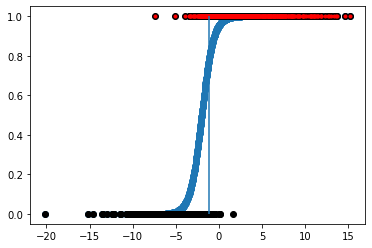

In [98]:
plt.scatter(x,pr)
plt.scatter(x,y_obs,c='black', marker='o')
plt.vlines(-np.sign(alpha_true) * np.log(np.abs(alpha_true)),0,1)
plt.scatter(x_censored,y_obs_censored,c='red',marker='.')

In [145]:
prior_beta_mu=0
prior_beta_sd=10
prior_alpha_mu=0
prior_alpha_b=10

In [146]:
with pm.Model() as model_simple:
    alpha = pm.Laplace('alpha', mu=prior_alpha_mu, b=prior_alpha_b)
    beta = pm.Normal('beta', mu=prior_beta_mu, sd=prior_beta_sd)
    mu = alpha + pm.math.dot(x, beta)    
    theta = pm.Deterministic('theta', pm.math.sigmoid(mu))
    bd = pm.Deterministic('bd', -alpha/beta)
    y = pm.Bernoulli('y', p=theta, observed=y_obs)


In [147]:
with pm.Model() as model_censored:
    alpha = pm.Laplace('alpha', mu=prior_alpha_mu, b=prior_alpha_b)
    beta = pm.Normal('beta', mu=prior_beta_mu, sd=prior_beta_sd)
    mu = alpha + pm.math.dot(x_censored, beta)    
    theta = pm.Deterministic('theta', pm.math.sigmoid(mu))
    bd = pm.Deterministic('bd', -alpha/beta)
    y = pm.Bernoulli('y', p=theta, observed=y_obs_censored)


In [148]:
with model_simple:
    trace_simple = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.


In [149]:
with model_censored:
    trace_censored = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.
There were 493 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6257942190624194, but should be close to 0.8. Try to increase the number of tuning steps.
There were 146 divergences after tuning. Increase `target_accept` or reparameterize.
There were 274 divergences after tuning. Increase `target_accept` or reparameterize.
There were 168 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


/Users/juan.lopez.arriaza/opt/anaconda3/envs/base-project/lib/python3.6/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


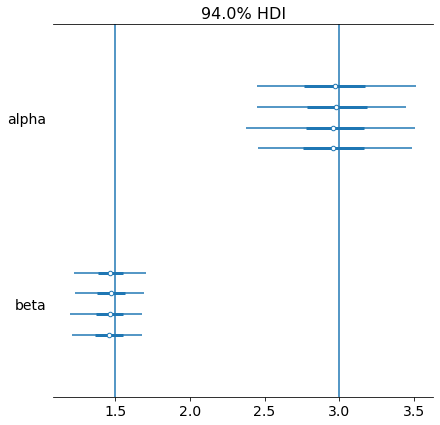

In [150]:
az.plot_forest(trace_simple, var_names=['alpha','beta'])
plt.vlines(alpha_true, -100, 100)
plt.vlines(beta_true, -100, 100)

/Users/juan.lopez.arriaza/opt/anaconda3/envs/base-project/lib/python3.6/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


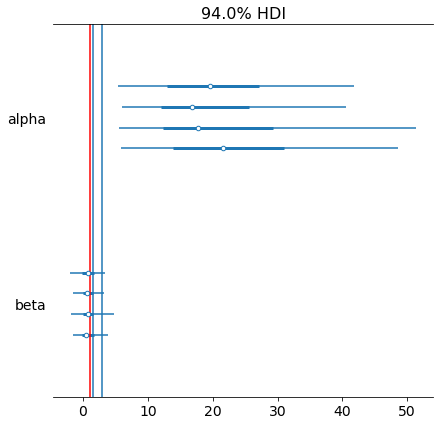

In [151]:
az.plot_forest(trace_censored, var_names=['alpha','beta'])
plt.vlines(alpha_true, -100, 100)
plt.vlines(beta_true, -100, 100)
plt.vlines(np.sign(alpha_true) * np.log(np.abs(alpha_true)),-100,100,color='red')

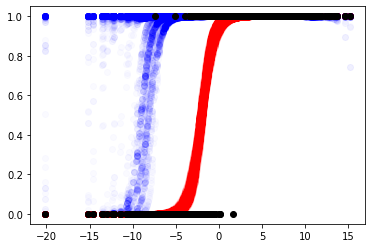

In [152]:
for sample in range(200):
    plt.scatter(x,1 / (1 + np.exp(-(trace_censored['alpha'][sample] + (x[:,None]*trace_censored['beta'][sample])))),c='blue',alpha=0.02)
    plt.scatter(x,1 / (1 + np.exp(-(trace_simple['alpha'][sample] + (x[:,None]*trace_simple['beta'][sample])))), c='red',alpha=0.02)

plt.scatter(x,y_obs, c='black')    
    

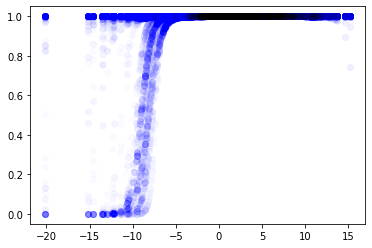

In [153]:
for sample in range(200):
    plt.scatter(x,1 / (1 + np.exp(-(trace_censored['alpha'][sample] + (x[:,None]*trace_censored['beta'][sample])))),c='blue',alpha=0.02)

plt.scatter(x_censored,y_obs_censored, c='black', alpha =0.1)    
    